In [139]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/our_data.csv')
#new columns
data['total_number_of_pixels'] = data['resolution_height'] * data['resolution_width']
data['total_pixels_per_square_of_diag'] = data['total_number_of_pixels'] / (data['display_size'] ** 2)

In [140]:
# from EDA: we can drop column secondary_storage_type, because it's information is already written in the column secondary_storage_capacity
data = data.drop(columns=['secondary_storage_type'])

<h1>TRANSFORMATION OF COLUMNS</h1>

1. Ordinal Encoding for year_of_warranty \
There are no zeros in year_of_warranty, so probably "No information" means 0 years of warranty

In [141]:
def transform_column(year_of_warranty):
    if year_of_warranty == '1':
        return 1
    if year_of_warranty == '2':
        return 2
    if year_of_warranty == '3':
        return 3
    if year_of_warranty == 'No information':
        return 0

data['year_of_warranty'] = data['year_of_warranty'].map(transform_column)
data['year_of_warranty']

0      1
1      1
2      1
3      1
4      1
      ..
787    1
788    1
789    1
790    1
791    1
Name: year_of_warranty, Length: 792, dtype: int64

2. is_touch_screen is bool, we will make it int

In [142]:
data['is_touch_screen'] = data['is_touch_screen'].astype(int)
data['is_touch_screen']

0      0
1      0
2      0
3      1
4      0
      ..
787    0
788    0
789    0
790    0
791    0
Name: is_touch_screen, Length: 792, dtype: int64

3. drop index and Model (maybe later we will try to extract more data from model, but for now we will drop it)

In [143]:
data = data.drop(columns=['Model', 'index'])
data.columns

Index(['brand', 'Price', 'Rating', 'processor_brand', 'processor_tier',
       'num_cores', 'num_threads', 'ram_memory', 'primary_storage_type',
       'primary_storage_capacity', 'secondary_storage_capacity', 'gpu_brand',
       'gpu_type', 'is_touch_screen', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'year_of_warranty', 'total_number_of_pixels',
       'total_pixels_per_square_of_diag'],
      dtype='object')

4. OneHotEncoding for column 'gpu_brand'

In [144]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')
data_encoded = pd.get_dummies(data, columns=['gpu_brand'])

# we can drop one column from gpu_brand because it is not necessary
data_encoded = data_encoded.drop(columns=['gpu_brand_arm'])
data_encoded

,brand,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,...,resolution_width,resolution_height,OS,year_of_warranty,total_number_of_pixels,total_pixels_per_square_of_diag,gpu_brand_amd,gpu_brand_apple,gpu_brand_intel,gpu_brand_nvidia
0,acer,31990,57,intel,core i3,6,8,8,SSD,512,...,1920,1080,windows,1,2073600,8520.710059,0,0,1,0
1,lenovo,56990,57,intel,core i5,8,12,16,SSD,512,...,1920,1080,windows,1,2073600,8520.710059,0,0,1,0
2,dell,39649,66,amd,ryzen 5,6,12,8,SSD,512,...,1920,1080,windows,1,2073600,10579.591837,1,0,0,0
3,dell,279490,88,intel,core i7,14,20,32,SSD,1024,...,3456,2160,windows,1,7464960,30674.556213,0,0,0,1
4,acer,119990,75,intel,core i7,16,24,16,SSD,1024,...,1920,1200,windows,1,2304000,9000.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,acer,37990,60,amd,ryzen 5,6,12,16,SSD,512,...,1920,1080,windows,1,2073600,8520.710059,1,0,0,0
788,hp,59871,71,amd,ryzen 5,6,12,8,SSD,512,...,1920,1080,windows,1,2073600,8520.710059,0,0,0,1
789,dell,47990,63,intel,core i5,4,8,8,SSD,512,...,1920,1080,windows,1,2073600,8520.710059,0,0,1,0
790,hp,74999,64,intel,core i5,10,12,8,SSD,512,...,1366,768,windows,1,1049088,5352.489796,0,0,1,0


In [145]:
data = data_encoded

5. OneHotEncoding for column 'gpu_type'

In [146]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')
data_encoded = pd.get_dummies(data, columns=['gpu_type'])

# we can drop one column from gpu_brand because it is not necessary
data_encoded = data_encoded.drop(columns=['gpu_type_dedicated'])
data_encoded

,brand,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,...,OS,year_of_warranty,total_number_of_pixels,total_pixels_per_square_of_diag,gpu_brand_amd,gpu_brand_apple,gpu_brand_intel,gpu_brand_nvidia,gpu_type_apple,gpu_type_integrated
0,acer,31990,57,intel,core i3,6,8,8,SSD,512,...,windows,1,2073600,8520.710059,0,0,1,0,0,1
1,lenovo,56990,57,intel,core i5,8,12,16,SSD,512,...,windows,1,2073600,8520.710059,0,0,1,0,0,1
2,dell,39649,66,amd,ryzen 5,6,12,8,SSD,512,...,windows,1,2073600,10579.591837,1,0,0,0,0,1
3,dell,279490,88,intel,core i7,14,20,32,SSD,1024,...,windows,1,7464960,30674.556213,0,0,0,1,0,0
4,acer,119990,75,intel,core i7,16,24,16,SSD,1024,...,windows,1,2304000,9000.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,acer,37990,60,amd,ryzen 5,6,12,16,SSD,512,...,windows,1,2073600,8520.710059,1,0,0,0,0,1
788,hp,59871,71,amd,ryzen 5,6,12,8,SSD,512,...,windows,1,2073600,8520.710059,0,0,0,1,0,0
789,dell,47990,63,intel,core i5,4,8,8,SSD,512,...,windows,1,2073600,8520.710059,0,0,1,0,0,1
790,hp,74999,64,intel,core i5,10,12,8,SSD,512,...,windows,1,1049088,5352.489796,0,0,1,0,0,1


In [147]:
data = data_encoded

6. OneHotEncoding for column 'OS'

In [148]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')
data_encoded = pd.get_dummies(data, columns=['OS'])

# we can drop one column from gpu_brand because it is not necessary
data_encoded = data_encoded.drop(columns=['OS_dos'])
data_encoded

,brand,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,...,gpu_brand_apple,gpu_brand_intel,gpu_brand_nvidia,gpu_type_apple,gpu_type_integrated,OS_chrome,OS_mac,OS_other,OS_ubuntu,OS_windows
0,acer,31990,57,intel,core i3,6,8,8,SSD,512,...,0,1,0,0,1,0,0,0,0,1
1,lenovo,56990,57,intel,core i5,8,12,16,SSD,512,...,0,1,0,0,1,0,0,0,0,1
2,dell,39649,66,amd,ryzen 5,6,12,8,SSD,512,...,0,0,0,0,1,0,0,0,0,1
3,dell,279490,88,intel,core i7,14,20,32,SSD,1024,...,0,0,1,0,0,0,0,0,0,1
4,acer,119990,75,intel,core i7,16,24,16,SSD,1024,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,acer,37990,60,amd,ryzen 5,6,12,16,SSD,512,...,0,0,0,0,1,0,0,0,0,1
788,hp,59871,71,amd,ryzen 5,6,12,8,SSD,512,...,0,0,1,0,0,0,0,0,0,1
789,dell,47990,63,intel,core i5,4,8,8,SSD,512,...,0,1,0,0,1,0,0,0,0,1
790,hp,74999,64,intel,core i5,10,12,8,SSD,512,...,0,1,0,0,1,0,0,0,0,1


In [149]:
data = data_encoded

7. OneHotEncoding for column 'brand'

In [150]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')
data_encoded = pd.get_dummies(data, columns=['brand'])

# we can drop one column from gpu_brand because it is not necessary
data_encoded = data_encoded.drop(columns=['brand_primebook'])
data_encoded

,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,secondary_storage_capacity,...,brand_lg,brand_microsoft,brand_msi,brand_realme,brand_samsung,brand_tecno,brand_ultimus,brand_walker,brand_wings,brand_zebronics
0,31990,57,intel,core i3,6,8,8,SSD,512,0,...,0,0,0,0,0,0,0,0,0,0
1,56990,57,intel,core i5,8,12,16,SSD,512,0,...,0,0,0,0,0,0,0,0,0,0
2,39649,66,amd,ryzen 5,6,12,8,SSD,512,0,...,0,0,0,0,0,0,0,0,0,0
3,279490,88,intel,core i7,14,20,32,SSD,1024,0,...,0,0,0,0,0,0,0,0,0,0
4,119990,75,intel,core i7,16,24,16,SSD,1024,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,37990,60,amd,ryzen 5,6,12,16,SSD,512,0,...,0,0,0,0,0,0,0,0,0,0
788,59871,71,amd,ryzen 5,6,12,8,SSD,512,0,...,0,0,0,0,0,0,0,0,0,0
789,47990,63,intel,core i5,4,8,8,SSD,512,0,...,0,0,0,0,0,0,0,0,0,0
790,74999,64,intel,core i5,10,12,8,SSD,512,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
data = data_encoded

8. 'Price'

We want to make it look like Normal Distribution more, so we will use log() and scale to 0 1

<AxesSubplot: xlabel='Price', ylabel='Count'>

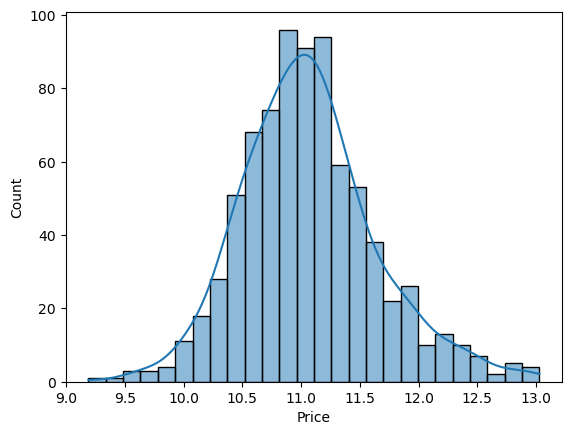

In [152]:
import seaborn as sns
sns.histplot(data=data, x=np.log(data['Price']), kde=True)

In [153]:
from scipy.stats import shapiro

stat, p = shapiro(np.log(data['Price']))
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Price looks Gaussian (fail to reject H0)')
else:
    print('Price does not look Gaussian (reject H0)')


Statistics=0.984, p=0.000
Price does not look Gaussian (reject H0)


((array([-3.12974082e+00, -2.85922457e+00, -2.70790846e+00, -2.60101058e+00,
         -2.51750146e+00, -2.44855288e+00, -2.38958922e+00, -2.33792159e+00,
         -2.29183086e+00, -2.25014891e+00, -2.21204460e+00, -2.17690478e+00,
         -2.14426372e+00, -2.11375906e+00, -2.08510312e+00, -2.05806358e+00,
         -2.03245001e+00, -2.00810431e+00, -1.98489371e+00, -1.96270564e+00,
         -1.94144375e+00, -1.92102492e+00, -1.90137696e+00, -1.88243672e+00,
         -1.86414864e+00, -1.84646358e+00, -1.82933785e+00, -1.81273242e+00,
         -1.79661230e+00, -1.78094596e+00, -1.76570491e+00, -1.75086331e+00,
         -1.73639765e+00, -1.72228647e+00, -1.70851014e+00, -1.69505064e+00,
         -1.68189138e+00, -1.66901708e+00, -1.65641363e+00, -1.64406792e+00,
         -1.63196784e+00, -1.62010208e+00, -1.60846013e+00, -1.59703220e+00,
         -1.58580911e+00, -1.57478228e+00, -1.56394367e+00, -1.55328573e+00,
         -1.54280137e+00, -1.53248391e+00, -1.52232704e+00, -1.51232484e+00,

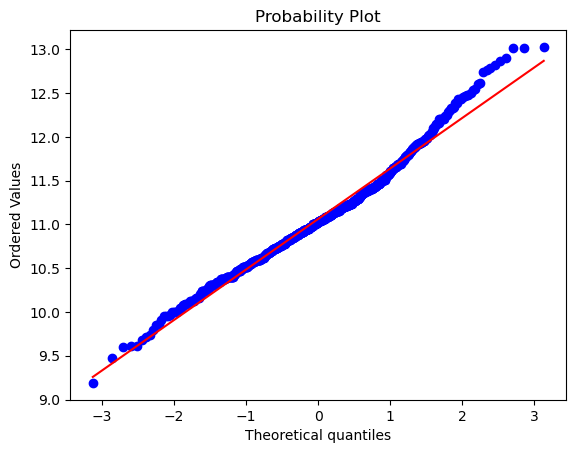

In [154]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(np.log(data['Price']), dist="norm", plot=plt)


In [155]:
data['Price'] = np.log(data['Price'])

It is still not a normal distribution but a lot better

In [156]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Price'] = scaler.fit_transform(data['Price'].values.reshape(-1, 1))

9. 'Rating' 

We want to make it look like Normal Distribution more, so we will use log() and scale to 0 1

<AxesSubplot: xlabel='Rating', ylabel='Count'>

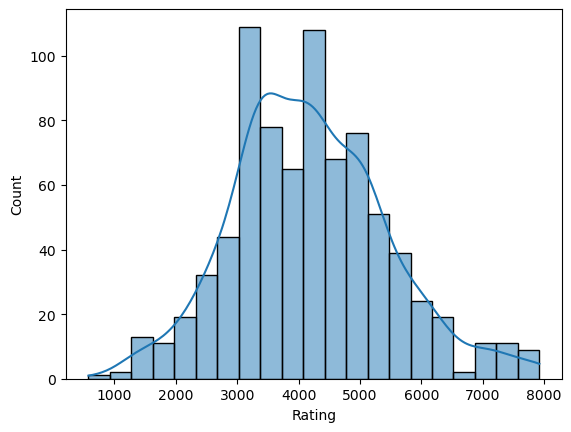

In [157]:
sns.histplot(data=data, x=np.power(data['Rating'], 2), kde=True)

In [158]:
data['Rating'] = np.power(data['Rating'], 2)

In [159]:
from scipy.stats import shapiro

stat, p = shapiro(np.log(data['Rating']))
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Price looks Gaussian (fail to reject H0)')
else:
    print('Price does not look Gaussian (reject H0)')


Statistics=0.956, p=0.000
Price does not look Gaussian (reject H0)


((array([-3.12974082e+00, -2.85922457e+00, -2.70790846e+00, -2.60101058e+00,
         -2.51750146e+00, -2.44855288e+00, -2.38958922e+00, -2.33792159e+00,
         -2.29183086e+00, -2.25014891e+00, -2.21204460e+00, -2.17690478e+00,
         -2.14426372e+00, -2.11375906e+00, -2.08510312e+00, -2.05806358e+00,
         -2.03245001e+00, -2.00810431e+00, -1.98489371e+00, -1.96270564e+00,
         -1.94144375e+00, -1.92102492e+00, -1.90137696e+00, -1.88243672e+00,
         -1.86414864e+00, -1.84646358e+00, -1.82933785e+00, -1.81273242e+00,
         -1.79661230e+00, -1.78094596e+00, -1.76570491e+00, -1.75086331e+00,
         -1.73639765e+00, -1.72228647e+00, -1.70851014e+00, -1.69505064e+00,
         -1.68189138e+00, -1.66901708e+00, -1.65641363e+00, -1.64406792e+00,
         -1.63196784e+00, -1.62010208e+00, -1.60846013e+00, -1.59703220e+00,
         -1.58580911e+00, -1.57478228e+00, -1.56394367e+00, -1.55328573e+00,
         -1.54280137e+00, -1.53248391e+00, -1.52232704e+00, -1.51232484e+00,

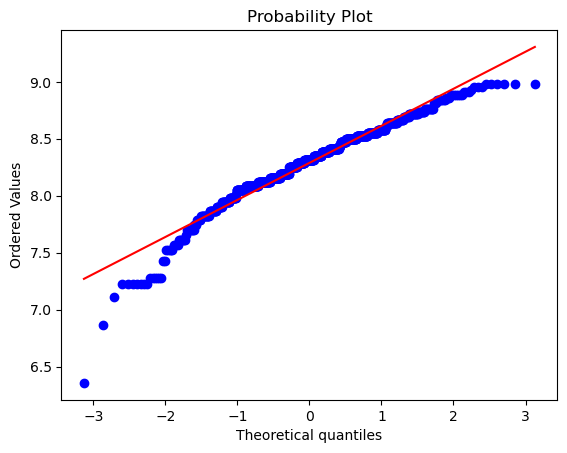

In [160]:
from scipy.stats import probplot

probplot(np.log(data['Rating']), dist="norm", plot=plt)


It is still not a normal distribution but a lot better

In [161]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Rating'] = scaler.fit_transform(data['Rating'].values.reshape(-1, 1))

In [162]:
data['Rating']

0      0.363921
1      0.363921
2      0.514636
3      0.975902
4      0.687406
         ...   
787    0.411709
788    0.607897
789    0.461947
790    0.479238
791    0.444929
Name: Rating, Length: 792, dtype: float64

10. OneHotEncoding for processor_brand

In [163]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')
data_encoded = pd.get_dummies(data, columns=['processor_brand'])

# we can drop one column from processor_brand because it is not necessary
data_encoded = data_encoded.drop(columns=['processor_brand_other'])
data_encoded

,Price,Rating,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,secondary_storage_capacity,is_touch_screen,...,brand_realme,brand_samsung,brand_tecno,brand_ultimus,brand_walker,brand_wings,brand_zebronics,processor_brand_amd,processor_brand_apple,processor_brand_intel
0,0.308341,0.363921,core i3,6,8,8,SSD,512,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.458845,0.363921,core i5,8,12,16,SSD,512,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.364284,0.514636,ryzen 5,6,12,8,SSD,512,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.873277,0.975902,core i7,14,20,32,SSD,1024,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.652896,0.687406,core i7,16,24,16,SSD,1024,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.353144,0.411709,ryzen 5,6,12,16,SSD,512,0,0,...,0,0,0,0,0,0,0,1,0,0
788,0.471699,0.607897,ryzen 5,6,12,8,SSD,512,0,0,...,0,0,0,0,0,0,0,1,0,0
789,0.414046,0.461947,core i5,4,8,8,SSD,512,0,0,...,0,0,0,0,0,0,0,0,0,1
790,0.530415,0.479238,core i5,10,12,8,SSD,512,0,0,...,0,0,0,0,0,0,0,0,0,1


In [164]:
data = data_encoded

11. OneHotEncoding for primary_storage_type

In [165]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')
data_encoded = pd.get_dummies(data, columns=['primary_storage_type'])

# we can drop one column from processor_brand because it is not necessary
data_encoded = data_encoded.drop(columns=['primary_storage_type_HDD'])
data_encoded

,Price,Rating,processor_tier,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,is_touch_screen,display_size,...,brand_samsung,brand_tecno,brand_ultimus,brand_walker,brand_wings,brand_zebronics,processor_brand_amd,processor_brand_apple,processor_brand_intel,primary_storage_type_SSD
0,0.308341,0.363921,core i3,6,8,8,512,0,0,15.6,...,0,0,0,0,0,0,0,0,1,1
1,0.458845,0.363921,core i5,8,12,16,512,0,0,15.6,...,0,0,0,0,0,0,0,0,1,1
2,0.364284,0.514636,ryzen 5,6,12,8,512,0,0,14.0,...,0,0,0,0,0,0,1,0,0,1
3,0.873277,0.975902,core i7,14,20,32,1024,0,1,15.6,...,0,0,0,0,0,0,0,0,1,1
4,0.652896,0.687406,core i7,16,24,16,1024,0,0,16.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.353144,0.411709,ryzen 5,6,12,16,512,0,0,15.6,...,0,0,0,0,0,0,1,0,0,1
788,0.471699,0.607897,ryzen 5,6,12,8,512,0,0,15.6,...,0,0,0,0,0,0,1,0,0,1
789,0.414046,0.461947,core i5,4,8,8,512,0,0,15.6,...,0,0,0,0,0,0,0,0,1,1
790,0.530415,0.479238,core i5,10,12,8,512,0,0,14.0,...,0,0,0,0,0,0,0,0,1,1


In [166]:
data = data_encoded

13. 'num_cores' transformation to ~Norm and scaling to [0,1]

<AxesSubplot: xlabel='num_cores', ylabel='Count'>

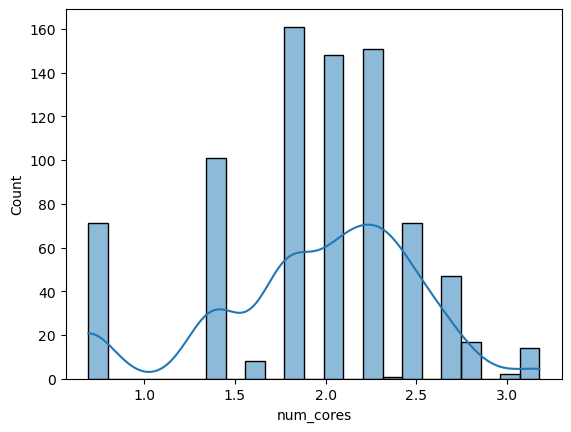

In [167]:
sns.histplot(data=data, x=np.log((data['num_cores'])), kde=True)

In [168]:
from scipy.stats import shapiro

stat, p = shapiro(np.log(data['num_cores']))
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Price looks Gaussian (fail to reject H0)')
else:
    print('Price does not look Gaussian (reject H0)')


Statistics=0.926, p=0.000
Price does not look Gaussian (reject H0)


((array([-3.12974082e+00, -2.85922457e+00, -2.70790846e+00, -2.60101058e+00,
         -2.51750146e+00, -2.44855288e+00, -2.38958922e+00, -2.33792159e+00,
         -2.29183086e+00, -2.25014891e+00, -2.21204460e+00, -2.17690478e+00,
         -2.14426372e+00, -2.11375906e+00, -2.08510312e+00, -2.05806358e+00,
         -2.03245001e+00, -2.00810431e+00, -1.98489371e+00, -1.96270564e+00,
         -1.94144375e+00, -1.92102492e+00, -1.90137696e+00, -1.88243672e+00,
         -1.86414864e+00, -1.84646358e+00, -1.82933785e+00, -1.81273242e+00,
         -1.79661230e+00, -1.78094596e+00, -1.76570491e+00, -1.75086331e+00,
         -1.73639765e+00, -1.72228647e+00, -1.70851014e+00, -1.69505064e+00,
         -1.68189138e+00, -1.66901708e+00, -1.65641363e+00, -1.64406792e+00,
         -1.63196784e+00, -1.62010208e+00, -1.60846013e+00, -1.59703220e+00,
         -1.58580911e+00, -1.57478228e+00, -1.56394367e+00, -1.55328573e+00,
         -1.54280137e+00, -1.53248391e+00, -1.52232704e+00, -1.51232484e+00,

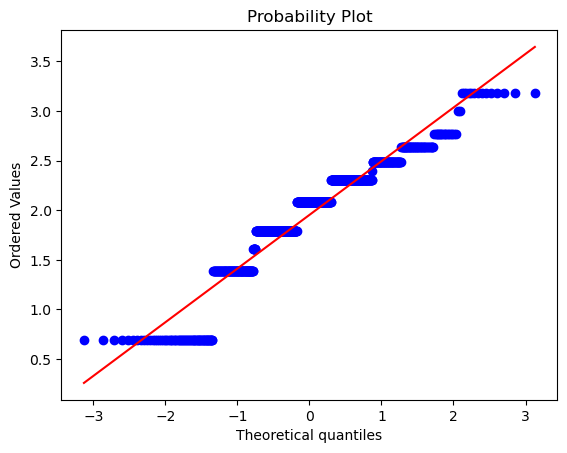

In [169]:
from scipy.stats import probplot

probplot(np.log(data['num_cores']), dist="norm", plot=plt)


It is still not a Normal distributionm, but much better :) Scaling to 0,1 now:

In [170]:
data['num_cores'] = np.log(data['num_cores'])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['num_cores'] = scaler.fit_transform(data['num_cores'].values.reshape(-1, 1))

14. 'num_threads' transformation

<AxesSubplot: xlabel='num_threads', ylabel='Count'>

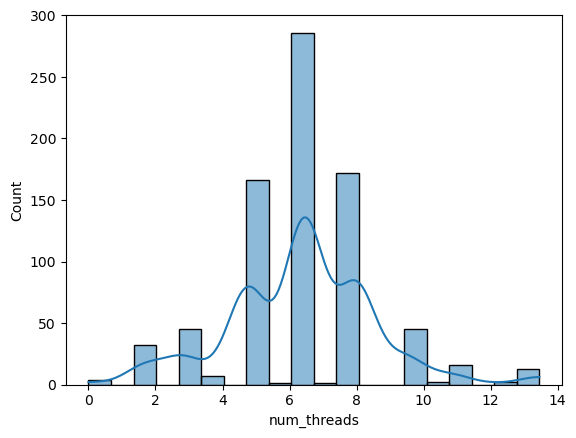

In [171]:
sns.histplot(data=data, x=np.power((data['num_threads']), 0.75), kde=True)

In [172]:
from scipy.stats import shapiro

stat, p = shapiro(np.power(data['num_threads'], 0.75))
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Price looks Gaussian (fail to reject H0)')
else:
    print('Price does not look Gaussian (reject H0)')


Statistics=0.933, p=0.000
Price does not look Gaussian (reject H0)


((array([-3.12974082e+00, -2.85922457e+00, -2.70790846e+00, -2.60101058e+00,
         -2.51750146e+00, -2.44855288e+00, -2.38958922e+00, -2.33792159e+00,
         -2.29183086e+00, -2.25014891e+00, -2.21204460e+00, -2.17690478e+00,
         -2.14426372e+00, -2.11375906e+00, -2.08510312e+00, -2.05806358e+00,
         -2.03245001e+00, -2.00810431e+00, -1.98489371e+00, -1.96270564e+00,
         -1.94144375e+00, -1.92102492e+00, -1.90137696e+00, -1.88243672e+00,
         -1.86414864e+00, -1.84646358e+00, -1.82933785e+00, -1.81273242e+00,
         -1.79661230e+00, -1.78094596e+00, -1.76570491e+00, -1.75086331e+00,
         -1.73639765e+00, -1.72228647e+00, -1.70851014e+00, -1.69505064e+00,
         -1.68189138e+00, -1.66901708e+00, -1.65641363e+00, -1.64406792e+00,
         -1.63196784e+00, -1.62010208e+00, -1.60846013e+00, -1.59703220e+00,
         -1.58580911e+00, -1.57478228e+00, -1.56394367e+00, -1.55328573e+00,
         -1.54280137e+00, -1.53248391e+00, -1.52232704e+00, -1.51232484e+00,

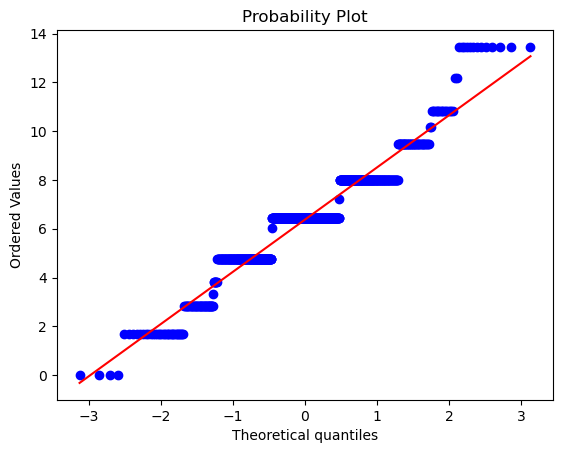

In [173]:
from scipy.stats import probplot

probplot(np.power(data['num_threads'], 0.75), dist="norm", plot=plt)


In [174]:
data['num_threads'] = np.power(data['num_threads'], 0.75)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['num_threads'] = scaler.fit_transform(data['num_threads'].values.reshape(-1, 1))

15. 'ram_memory' scaling to (0,1)

In [175]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['ram_memory'] = scaler.fit_transform(data['ram_memory'].values.reshape(-1, 1))

16. transform primary_storage_capacity, secondary_storage_capacity

In [176]:
def transform_capacity(cap):
    if cap == 0:
        return 0
    if cap == 32:
        return 1
    if cap == 64:
        return 2
    if cap == 128:
        return 3
    if cap == 256:
        return 4
    if cap == 512:
        return 5
    if cap == 1024:
        return 6
    if cap == 2048:
        return 7
    
data['primary_storage_capacity'] = data['primary_storage_capacity'].map(transform_capacity)
data['secondary_storage_capacity'] = data['secondary_storage_capacity'].map(transform_capacity)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['primary_storage_capacity'] = scaler.fit_transform(data['primary_storage_capacity'].values.reshape(-1, 1))
data['secondary_storage_capacity'] = scaler.fit_transform(data['secondary_storage_capacity'].values.reshape(-1, 1))

16. 'display_size' transformation

<AxesSubplot: xlabel='display_size', ylabel='Count'>

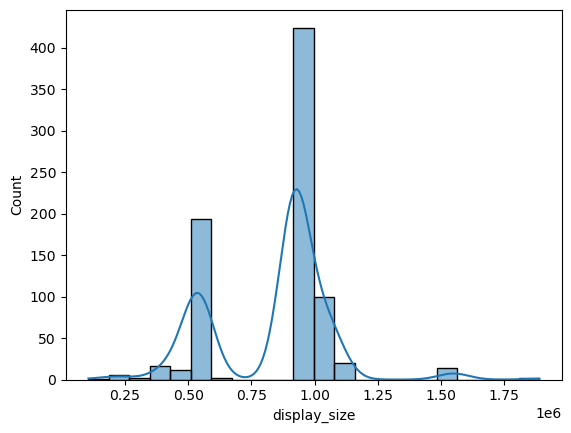

In [177]:
sns.histplot(data=data, x=np.power((data['display_size']), 5), kde=True)

In [178]:
from scipy.stats import shapiro

stat, p = shapiro(np.power(data['display_size'], 5))
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Price looks Gaussian (fail to reject H0)')
else:
    print('Price does not look Gaussian (reject H0)')


Statistics=0.804, p=0.000
Price does not look Gaussian (reject H0)


((array([-3.12974082e+00, -2.85922457e+00, -2.70790846e+00, -2.60101058e+00,
         -2.51750146e+00, -2.44855288e+00, -2.38958922e+00, -2.33792159e+00,
         -2.29183086e+00, -2.25014891e+00, -2.21204460e+00, -2.17690478e+00,
         -2.14426372e+00, -2.11375906e+00, -2.08510312e+00, -2.05806358e+00,
         -2.03245001e+00, -2.00810431e+00, -1.98489371e+00, -1.96270564e+00,
         -1.94144375e+00, -1.92102492e+00, -1.90137696e+00, -1.88243672e+00,
         -1.86414864e+00, -1.84646358e+00, -1.82933785e+00, -1.81273242e+00,
         -1.79661230e+00, -1.78094596e+00, -1.76570491e+00, -1.75086331e+00,
         -1.73639765e+00, -1.72228647e+00, -1.70851014e+00, -1.69505064e+00,
         -1.68189138e+00, -1.66901708e+00, -1.65641363e+00, -1.64406792e+00,
         -1.63196784e+00, -1.62010208e+00, -1.60846013e+00, -1.59703220e+00,
         -1.58580911e+00, -1.57478228e+00, -1.56394367e+00, -1.55328573e+00,
         -1.54280137e+00, -1.53248391e+00, -1.52232704e+00, -1.51232484e+00,

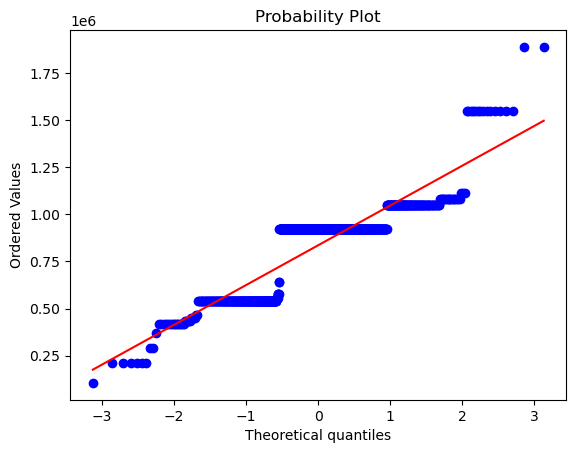

In [179]:
from scipy.stats import probplot

probplot(np.power(data['display_size'], 5), dist="norm", plot=plt)


In [180]:
data['display_size'] = np.power(data['display_size'], 5)


In [181]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['display_size'] = scaler.fit_transform(data['display_size'].values.reshape(-1, 1))

16. 'resolution_height'  transformation

<AxesSubplot: xlabel='resolution_height', ylabel='Count'>

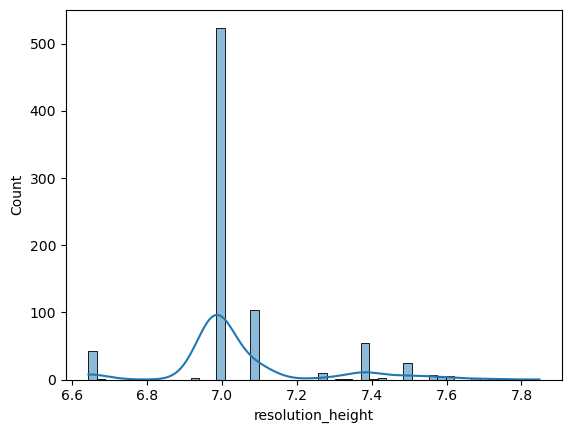

In [182]:
sns.histplot(data=data, x=np.log((data['resolution_height'])), kde=True)

a little better 

In [183]:
data['resolution_height'] = np.log(data['resolution_height'])

In [184]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['resolution_height'] = scaler.fit_transform(data['resolution_height'].values.reshape(-1, 1))

17. 'resolution_width' transformation

<AxesSubplot: xlabel='resolution_width', ylabel='Count'>

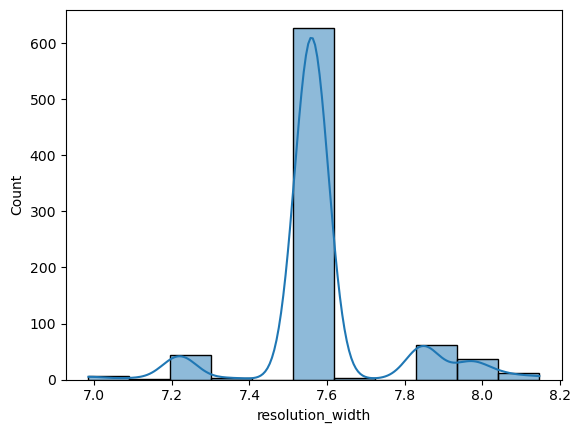

In [185]:
sns.histplot(data=data, x=np.log((data['resolution_width'])), kde=True)

In [186]:
data['resolution_width'] = np.log(data['resolution_width'])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['resolution_width'] = scaler.fit_transform(data['resolution_width'].values.reshape(-1, 1))

18. 'total_number_of_pixels' transformation

<AxesSubplot: xlabel='total_number_of_pixels', ylabel='Count'>

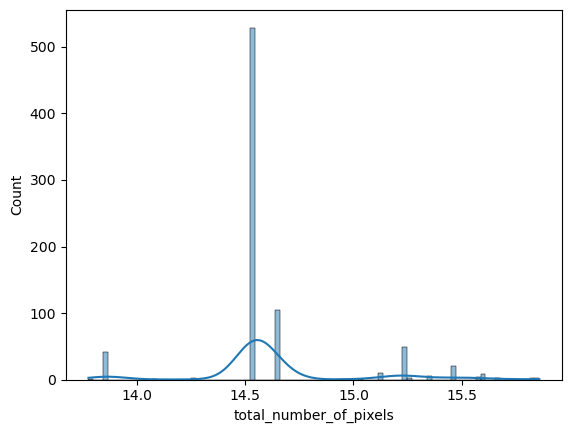

In [187]:
sns.histplot(data=data, x=np.log((data['total_number_of_pixels'])), kde=True)

In [188]:
data['total_number_of_pixels'] = np.log(data['total_number_of_pixels'])

In [189]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['total_number_of_pixels'] = scaler.fit_transform(data['total_number_of_pixels'].values.reshape(-1, 1))

19. 'total_pixels_per_square_of_diag' transformation

<AxesSubplot: xlabel='total_pixels_per_square_of_diag', ylabel='Count'>

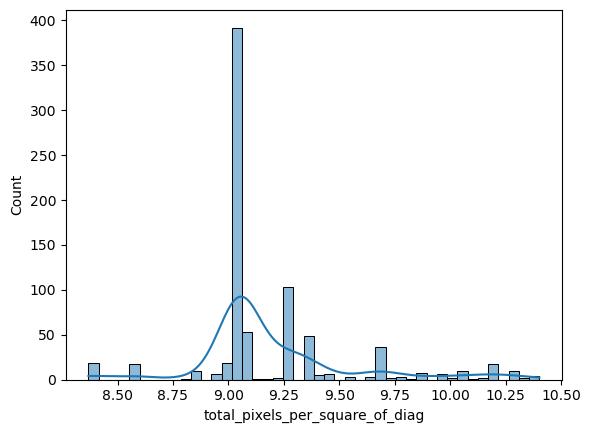

In [190]:
sns.histplot(data=data, x=np.log((data['total_pixels_per_square_of_diag'])), kde=True)

In [191]:
data['total_pixels_per_square_of_diag'] = np.log(data['total_pixels_per_square_of_diag'])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['total_pixels_per_square_of_diag'] = scaler.fit_transform(data['total_pixels_per_square_of_diag'].values.reshape(-1, 1))

20. 'processor_tier' transformation (OrdinalEncoding)

In [192]:
def transform_column(proc_tier):
    if proc_tier == 'other':
        return 0;
    if proc_tier=='celeron':
        return 1;
    if proc_tier=='pentium':
        return 2;
    if proc_tier=='core i3' or proc_tier=='ryzen 3':
        return 3;
    if proc_tier=='core i5' or proc_tier=='ryzen 5':
        return 4;
    if proc_tier=='core i7' or proc_tier=='ryzen 7' or proc_tier=='core ultra 7':
        return 5;
    if proc_tier=='core i9' or proc_tier=='ryzen 9':
        return 6;
    if proc_tier=='m1' or proc_tier == 'm2' or proc_tier == 'm3':
        return 7;

data['processor_tier'] = data['processor_tier'].map(transform_column)

In [193]:
#FINALLY
data

,Price,Rating,processor_tier,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,is_touch_screen,display_size,...,brand_samsung,brand_tecno,brand_ultimus,brand_walker,brand_wings,brand_zebronics,processor_brand_amd,processor_brand_apple,processor_brand_intel,primary_storage_type_SSD
0,0.308341,0.363921,3,0.442114,0.353553,0.176471,0.666667,0.0,0,0.458846,...,0,0,0,0,0,0,0,0,1,1
1,0.458845,0.363921,4,0.557886,0.479207,0.411765,0.666667,0.0,0,0.458846,...,0,0,0,0,0,0,0,0,1,1
2,0.364284,0.514636,4,0.442114,0.479207,0.176471,0.666667,0.0,0,0.242494,...,0,0,0,0,0,0,1,0,0,1
3,0.873277,0.975902,5,0.783092,0.702927,0.882353,0.833333,0.0,1,0.458846,...,0,0,0,0,0,0,0,0,1,1
4,0.652896,0.687406,5,0.836829,0.805927,0.411765,0.833333,0.0,0,0.528715,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.353144,0.411709,4,0.442114,0.479207,0.411765,0.666667,0.0,0,0.458846,...,0,0,0,0,0,0,1,0,0,1
788,0.471699,0.607897,4,0.442114,0.479207,0.176471,0.666667,0.0,0,0.458846,...,0,0,0,0,0,0,1,0,0,1
789,0.414046,0.461947,4,0.278943,0.353553,0.176471,0.666667,0.0,0,0.458846,...,0,0,0,0,0,0,0,0,1,1
790,0.530415,0.479238,4,0.647685,0.479207,0.176471,0.666667,0.0,0,0.242494,...,0,0,0,0,0,0,0,0,1,1


<h1> Correlation matrix </h1>

In [194]:
cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)
cor_matrix

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_68021/2731314149.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)


,Price,Rating,processor_tier,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,is_touch_screen,display_size,resolution_width,resolution_height,year_of_warranty,total_number_of_pixels,total_pixels_per_square_of_diag,gpu_brand_amd,gpu_brand_apple,gpu_brand_intel,gpu_brand_nvidia,gpu_type_apple,gpu_type_integrated,OS_chrome,OS_mac,OS_other,OS_ubuntu,OS_windows,brand_acer,brand_apple,brand_asus,brand_avita,brand_chuwi,brand_dell,brand_fujitsu,brand_gigabyte,brand_honor,brand_hp,brand_iball,brand_infinix,brand_jio,brand_lenovo,brand_lg,brand_microsoft,brand_msi,brand_realme,brand_samsung,brand_tecno,brand_ultimus,brand_walker,brand_wings,brand_zebronics,processor_brand_amd,processor_brand_apple,processor_brand_intel,primary_storage_type_SSD
Price,1.0000,0.7838,0.7973,0.7563,0.8084,0.6591,0.6370,-0.0024,0.1698,0.2540,0.6220,0.6277,0.1458,0.6607,0.5530,-0.2483,0.2153,-0.3393,0.5134,0.2153,-0.5624,-0.2388,0.2153,-0.1328,-0.0175,0.1594,-0.1138,0.2153,0.0417,-0.0766,-0.0944,0.1212,0.0012,0.0202,-0.0226,0.0083,-0.1149,-0.1137,-0.0901,-0.0763,0.0883,0.0283,0.1170,-0.0334,-0.0040,-0.0673,-0.1405,-0.0849,-0.0790,-0.0853,-0.0978,0.2153,0.0548,0.1587
Rating,0.7838,1.0000,0.6752,0.5934,0.7789,0.6492,0.6180,0.0355,0.0665,0.3865,0.4628,0.4355,0.1752,0.4736,0.3211,-0.1313,-0.1335,-0.4801,0.6617,-0.1335,-0.6372,-0.3037,-0.1335,-0.1356,-0.0163,0.3721,-0.0921,-0.1335,0.0698,-0.0522,-0.0819,0.0142,0.0204,0.0289,-0.0105,0.0232,-0.0702,-0.0797,-0.1013,-0.0703,0.0797,-0.0278,0.2207,-0.0415,-0.0280,0.0019,-0.0876,-0.0790,-0.0592,-0.0071,0.0670,-0.1335,-0.0094,0.1364
processor_tier,0.7973,0.6752,1.0000,0.6815,0.7808,0.5511,0.6270,-0.0173,0.0325,0.2104,0.5247,0.5187,0.1017,0.5511,0.4494,-0.0626,0.3272,-0.3570,0.3693,0.3272,-0.4568,-0.3838,0.3272,-0.1823,-0.0016,0.1786,-0.0614,0.3272,0.0149,-0.0248,-0.1131,0.0444,0.0427,-0.0023,-0.0023,-0.0511,-0.1288,-0.0148,-0.1288,-0.0677,0.0612,-0.0023,0.1223,-0.0334,0.0107,-0.0023,-0.1131,-0.0970,-0.0028,-0.0170,0.0796,0.3272,-0.1359,0.2376
num_cores,0.7563,0.5934,0.6815,1.0000,0.8760,0.5298,0.4846,-0.0465,0.0879,0.2047,0.4569,0.4432,0.1113,0.4751,0.3900,-0.2467,0.0721,-0.1572,0.3396,0.0721,-0.3537,-0.2676,0.0721,0.0114,-0.0360,0.2071,-0.0274,0.0721,0.0273,-0.0327,-0.0730,0.0814,0.0214,0.0296,-0.0015,-0.0018,-0.0360,-0.0507,0.0081,-0.1167,0.0545,0.0315,0.1171,-0.0800,0.0550,-0.0821,-0.1133,-0.0800,-0.0624,-0.0302,-0.2086,0.0721,0.1829,0.1396
num_threads,0.8084,0.7789,0.7808,0.8760,1.0000,0.6158,0.6028,-0.0243,0.0099,0.3523,0.4906,0.4738,0.1243,0.5090,0.3638,-0.0894,-0.0423,-0.3786,0.5024,-0.0423,-0.4972,-0.2950,-0.0423,-0.1453,-0.0261,0.3036,-0.0296,-0.0423,0.0752,-0.0369,-0.0811,0.0531,0.0193,0.0193,0.0016,-0.0079,-0.1027,-0.0430,-0.1027,-0.0935,0.0540,0.0016,0.1487,-0.0571,0.0138,-0.0589,-0.1025,-0.0756,-0.0452,-0.0418,0.0251,-0.0423,0.0110,0.1908
ram_memory,0.6591,0.6492,0.5511,0.5298,0.6158,1.0000,0.5050,0.0183,0.1128,0.1524,0.4104,0.4226,0.0997,0.4407,0.3685,-0.1207,-0.0593,-0.2032,0.3354,-0.0593,-0.3271,-0.1847,-0.0593,-0.0835,-0.0325,0.2726,-0.0496,-0.0593,0.0939,-0.0460,-0.0410,0.0182,0.0291,-0.0084,0.0291,-0.0388,-0.0723,0.0718,-0.0590,-0.0771,0.0506,-0.0084,0.1161,-0.0325,-0.0014,-0.0084,-0.0717,-0.0590,-0.0256,-0.0363,-0.0398,-0.0593,0.0668,0.1020
primary_storage_capacity,0.6370,0.6180,0.6270,0.4846,0.6028,0.5050,1.0000,0.1204,0.0040,0.2851,0.4340,0.3749,0.0747,0.4250,0.2909,-0.0424,-0.0059,-0.2261,0.3019,-0.0059,-0.2999,-0.5359,-0.0059,-0.2349,-0.0061,0.3848,-0.0347,-0.0059,-0.0255,-0.0087,-0.0414,0.1043,-0.0087,-0.0087,-0.0087,0.0027,-0.2193,0.0096,-0.1660,-0.0442,0.0068,-0.0841,0.1610,-0.0594,-0.0137,0.0290,-0.0722,-0.1127,-0.0414,-0.0150,0.0364,-0.0059,-0.0034,0.2328
secondary_storage_capacity,-0.0024,0.0355,-0.0173,-0.0465,-0.0243,0.0183,0.1204,1.0000,-0.0098,0.0158,-0.0626,-0.0706,-0.3640,-0.0707,-0.0674,-0.0533,-0.0146,-0.0517,0.1010,-0.0146,-0.0910,-0.0169,-0.0146,-0.0059,-0.0042,0.0329,-0.0373,-0.0146,-0.0617,-0.0059,-0.0073,-0.0044,-0.0059,-0.0059,-0.0059,-0.0025,

from colleration matrix: we can drop secondary_storage_capacity, gpu_type_apple, OS_mac, processor_brand_apple, brand_apple \
other columns are not correlated

In [195]:
data = data.drop(columns=['gpu_type_apple', 'OS_mac', 'processor_brand_apple', 'brand_apple'])

<h1>Variances</h1>

In [196]:
data.var().sort_values()

brand_walker                       0.001263
brand_iball                        0.001263
brand_jio                          0.001263
brand_realme                       0.001263
OS_ubuntu                          0.001263
brand_tecno                        0.002522
brand_microsoft                    0.002522
brand_fujitsu                      0.002522
OS_other                           0.002522
brand_honor                        0.002522
brand_avita                        0.002522
brand_gigabyte                     0.002522
brand_chuwi                        0.003778
brand_ultimus                      0.003778
brand_wings                        0.003778
brand_samsung                      0.006281
brand_zebronics                    0.007528
brand_lg                           0.007528
secondary_storage_capacity         0.008878
primary_storage_capacity           0.012380
gpu_brand_apple                    0.014941
brand_infinix                      0.014941
display_size                    

In [197]:
data.to_csv('../data/our_data_preprocessed.csv', index=False)